# Law 软件包的教程（一）——读取数据并推荐法律

这篇教程教你如何从数据库中导出数据，并且利用字典把所有的文字转换为数字表达形式，从而可以直接使用tensorflow进行深度学习，或scikit learn学习

你可以配合https://chenyangzhu.github.io/sufelaw2019/ 官方文档查看这个介绍

In [1]:
import law
import pandas as pd
import numpy as np
import mysql.connector
import sklearn.model_selection
import matplotlib.pyplot as plt

%matplotlib inline

首先，连接数据库，你的账户和密码分别为你的姓名拼音和law+拼音例如：
```
user = 'zhuchenyang'
password = 'law-zhuchenyang'
```

In [2]:
cnx_case = mysql.connector.connect(user="root", password="sufelaw2019",  # 注意修改
                              host="cdb-74dx1ytr.gz.tencentcdb.com",
                              port = "10008",
                              database="law")

在你连接了数据库之后，使用SQL 语言查询任何你想要的数据

数据库的详细构造和可使用的数据类型，可以在[这里](https://chenyangzhu.github.io/sufelaw2019/#/database)查看

In [3]:
data = pd.read_sql('SELECT * FROM Civil WHERE result LIKE "%劳动法%";',con=cnx_case)

# 一、构建embedding model

接下来我们处理NLP，我们直接使用Embedding这个主类来处理。注意：尽管我们**并没有真正做embedding**，但现在的函数就先叫这个名字，embedding可以直接用tensorflow来完成，我们这里做的是cutting，mapping和padding。

In [4]:
mtd = law.embedding.Embedding("./law/dict/dictionary.csv", "./law/dict/jieba_dict.txt")

Building Dictionary from  ./law/dict/dictionary.csv


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.694 seconds.
Prefix dict has been built succesfully.


在这一个embed_pandas文件里，我们对每一条信息做一下处理：

- 首先做entity recognition，即找到其中的被告姓名，原告姓名，并用特定符号代替，从而我们有consistent的人称指代。
- 其次我们用jieba分词cut所有的字符串，得到一系列的string list
- 然后我们把这些string list通过字典map到数字域中，从而得到int list
- 最后，我们利用padding，把所有的字符int list全部拓展到指定的维度，默认为2000个字符。

In [5]:
num_list = mtd.embed_pandas(df=data,targets = "process")

Doing 0 . Total 1184
Doing 20 . Total 1184
Doing 40 . Total 1184
Doing 60 . Total 1184
Doing 80 . Total 1184
Doing 100 . Total 1184
Doing 120 . Total 1184
Doing 140 . Total 1184
Doing 160 . Total 1184
Doing 180 . Total 1184
Doing 200 . Total 1184
Doing 220 . Total 1184
Doing 240 . Total 1184
Doing 260 . Total 1184
Doing 280 . Total 1184
Doing 300 . Total 1184
Doing 320 . Total 1184
Doing 340 . Total 1184
Doing 360 . Total 1184
Doing 380 . Total 1184
Doing 400 . Total 1184
Doing 420 . Total 1184
Doing 440 . Total 1184
Doing 460 . Total 1184
Doing 480 . Total 1184
Doing 500 . Total 1184
Doing 520 . Total 1184
Doing 540 . Total 1184
Doing 560 . Total 1184
Doing 580 . Total 1184
Doing 600 . Total 1184
Doing 620 . Total 1184
Doing 640 . Total 1184
Doing 660 . Total 1184
Doing 680 . Total 1184
Doing 700 . Total 1184
Doing 720 . Total 1184
Doing 740 . Total 1184
Doing 760 . Total 1184
Doing 780 . Total 1184
Doing 800 . Total 1184
Doing 820 . Total 1184
Doing 840 . Total 1184
Doing 860 . Total

In [7]:
num_list.shape

(1184, 2000)

In [8]:
num_list[:10]

array([[   6,   45,    6, ...,    0,    0,    0],
       [1059,    2,   29, ...,    0,    0,    0],
       [1059,   20,   11, ...,    0,    0,    0],
       ...,
       [1059,    2,  442, ...,    0,    0,    0],
       [1059,    2,  442, ...,    0,    0,    0],
       [1059,    2,  442, ...,    0,    0,    0]])

`mapped_and_padded`矩阵就是我们已经cut、map和pad过的X矩阵了。接下来我们来处理标签y

# 二、使用API 找到文本中出现的全部法律

我们使用`law.utils.find_law_in_series`的函数来调取`result`中出现的所有法律和条款名称

In [9]:
used_law = law.utils.find_law_in_series(data['result'])

In [10]:
used_law[:10]

[[['《中华人民共和国民事诉讼法》', ['第二百五十三条'], []],
  ['《中华人民共和国劳动法》', ['第四十五条'], []],
  ['《中华人民共和国劳动合同法》', ['第四十四条'], []]],
 [['《中华人民共和国民事诉讼法》', ['第一百一十九条', '第一百五十四条'], ['第一百五十四条第一款']],
  ['《中华人民共和国劳动法》', ['第二条'], []],
  ['《最高人民法院关于审理劳动争议案件适用法律若干问题的解释》', ['第一条'], []]],
 [['《中华人民共和国民事诉讼法》', ['第二百五十三条'], []], ['《中华人民共和国劳动法》', ['第三条'], []]],
 [['《中华人民共和国民事诉讼法》', ['第二百五十三条'], []], ['《中华人民共和国劳动法》', ['第三条'], []]],
 [['《中华人民共和国民事诉讼法》', ['第二百五十三条'], []], ['《中华人民共和国劳动法》', ['第三条'], []]],
 [['《中华人民共和国民事诉讼法》', ['第二百五十三条'], []], ['《中华人民共和国劳动法》', ['第三条'], []]],
 [['《中华人民共和国民事诉讼法》', ['第二百五十三条'], []], ['《中华人民共和国劳动法》', ['第三条'], []]],
 [['《中华人民共和国民事诉讼法》', ['第二百五十三条'], []],
  ['《中华人民共和国劳动法》', ['第七十二条', '第七十三条'], []]],
 [['《中华人民共和国民事诉讼法》', ['第二百五十三条'], []], ['《中华人民共和国劳动法》', ['第五十条'], []]],
 [['《中华人民共和国民事诉讼法》', ['第二百五十三条'], []],
  ['《中华人民共和国劳动法》', ['第四十四条'], []],
  ['《中华人民共和国劳动争议调解仲裁法》', ['第六条'], []],
  ['《职工带薪年休假条例》', ['第三条、第五条'], []]]]

可以看到，这个结果是用数组存储的，为了方便之后的回归模型等，我们对每一个case，只选择一条法律（本例为劳动法）和出现的第一条来做后面的回归。

In [11]:
law_list = []
for each_case in used_law:
    case_law = []
    flag = 0
    for each_law in each_case:
        if "劳动法" in each_law[0]:
            try:
                # 注意这里只取了一个法律
                only_one_tiao = each_law[1][0]
            except:
                only_one_tiao = ' '
            case_law = [each_law[0],only_one_tiao]
            flag = 1
    if not flag:
        case_law = [" "]
    law_list.append(case_law)

law_list = pd.DataFrame(law_list)
law_list = law_list.rename(columns={0:"law_used",1:"tiao_used"})

处理结束后，得到了如下的表，这里的index和我们原始的表中的index是一致的。

In [12]:
law_list.head()

,law_used,tiao_used
0,《中华人民共和国劳动法》,第四十五条
1,《中华人民共和国劳动法》,第二条
2,《中华人民共和国劳动法》,第三条
3,《中华人民共和国劳动法》,第三条
4,《中华人民共和国劳动法》,第三条


In [13]:
# 看看我们的y和x的维度是否一致
law_list.shape[0] == num_list.shape[0]

True

事实由于我只取了劳动法，所以我们其实只需要tiao即可了，但可以看到tiao其实还有没有请洗干净的，例如none和" "，我们不想要这些数据

In [14]:
# 需要排除的index包括
drop_list = list(law_list[law_list['tiao_used'] == ' '].index)
drop_list.extend(list(law_list[law_list['tiao_used'] == None].index))

drop_list

[96,
 128,
 230,
 232,
 333,
 351,
 495,
 496,
 646,
 808,
 809,
 952,
 991,
 1004,
 1005,
 1039,
 1049,
 1139]

我们需要同时在X 和Y中drop这些点

In [16]:
X = np.delete(num_list,drop_list,0)
y = law_list.drop(index=drop_list,axis=0)['tiao_used']

最后，我们把y变为数字向量，当然还有很多其他方法，这里只列举一种。

+1 是因为factorize时候会生成一个 -1，所以我们要把他移到0的位置

In [17]:
y = pd.factorize(y)[0] + 1

(array([594., 135., 163.,  27., 101.,  11., 102.,  14.,  11.,   8.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <a list of 10 Patch objects>)

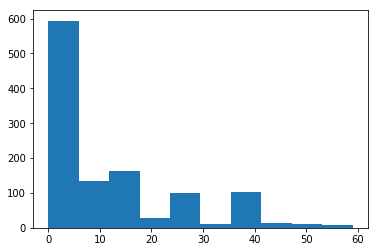

In [18]:
plt.hist(y)

至此，X 和y已经构建完毕，我们接着划分train val 和test

In [19]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=2)

# 三、模型

由于我们的模型还是以deep learning为主，这里随意套一个多分类模型，作为教程示范。

In [20]:
import tensorflow as tf

tf.__version__

'2.0.0-alpha0'

In [21]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(4896, 16)) # 4896是字典的大小
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(61, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          78336     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 61)                1037      
Total params: 79,645
Trainable params: 79,645
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [23]:
history = model.fit(X,y,epochs=300, batch_size=64, validation_data=(X_val, y_val))

Train on 1166 samples, validate on 187 samples
Epoch 1/300
1166/1166 [==============================] - 0s 392us/sample - loss: 4.1017 - acc: 0.0832 - val_loss: 4.0924 - val_acc: 0.1070
Epoch 2/300
1166/1166 [==============================] - 0s 227us/sample - loss: 4.0787 - acc: 0.1149 - val_loss: 4.0677 - val_acc: 0.1070
Epoch 3/300
1166/1166 [==============================] - 0s 231us/sample - loss: 4.0463 - acc: 0.1149 - val_loss: 4.0304 - val_acc: 0.1070
Epoch 4/300
1166/1166 [==============================] - 0s 220us/sample - loss: 3.9959 - acc: 0.1149 - val_loss: 3.9723 - val_acc: 0.1070
Epoch 5/300
1166/1166 [==============================] - 0s 219us/sample - loss: 3.9194 - acc: 0.1149 - val_loss: 3.8844 - val_acc: 0.1070
Epoch 6/300
1166/1166 [==============================] - 0s 221us/sample - loss: 3.8099 - acc: 0.1149 - val_loss: 3.7638 - val_acc: 0.1070
Epoch 7/300
1166/1166 [==============================] - 0s 219us/sample - loss: 3.6683 - acc: 0.1149 - val_loss: 3.616

1166/1166 [==============================] - 0s 216us/sample - loss: 2.8588 - acc: 0.1149 - val_loss: 2.9626 - val_acc: 0.1070
Epoch 60/300
1166/1166 [==============================] - 0s 212us/sample - loss: 2.8572 - acc: 0.1149 - val_loss: 2.9605 - val_acc: 0.1070
Epoch 61/300
1166/1166 [==============================] - 0s 215us/sample - loss: 2.8560 - acc: 0.1149 - val_loss: 2.9580 - val_acc: 0.1070
Epoch 62/300
1166/1166 [==============================] - 0s 218us/sample - loss: 2.8547 - acc: 0.1149 - val_loss: 2.9557 - val_acc: 0.1070
Epoch 63/300
1166/1166 [==============================] - 0s 214us/sample - loss: 2.8532 - acc: 0.1149 - val_loss: 2.9536 - val_acc: 0.1070
Epoch 64/300
1166/1166 [==============================] - 0s 214us/sample - loss: 2.8507 - acc: 0.1149 - val_loss: 2.9497 - val_acc: 0.1070
Epoch 65/300
1166/1166 [==============================] - 0s 216us/sample - loss: 2.8485 - acc: 0.1149 - val_loss: 2.9466 - val_acc: 0.1070
Epoch 66/300
1166/1166 [=========

1166/1166 [==============================] - 0s 215us/sample - loss: 2.4437 - acc: 0.2093 - val_loss: 2.4352 - val_acc: 0.2406
Epoch 118/300
1166/1166 [==============================] - 0s 215us/sample - loss: 2.4346 - acc: 0.2093 - val_loss: 2.4267 - val_acc: 0.2353
Epoch 119/300
1166/1166 [==============================] - 0s 219us/sample - loss: 2.4237 - acc: 0.2110 - val_loss: 2.4167 - val_acc: 0.2353
Epoch 120/300
1166/1166 [==============================] - 0s 214us/sample - loss: 2.4139 - acc: 0.2161 - val_loss: 2.4049 - val_acc: 0.2406
Epoch 121/300
1166/1166 [==============================] - 0s 213us/sample - loss: 2.4050 - acc: 0.2161 - val_loss: 2.3928 - val_acc: 0.2406
Epoch 122/300
1166/1166 [==============================] - 0s 217us/sample - loss: 2.3957 - acc: 0.2153 - val_loss: 2.3855 - val_acc: 0.2406
Epoch 123/300
1166/1166 [==============================] - 0s 224us/sample - loss: 2.3858 - acc: 0.2170 - val_loss: 2.3798 - val_acc: 0.2353
Epoch 124/300
1166/1166 [==

1166/1166 [==============================] - 0s 227us/sample - loss: 1.7193 - acc: 0.5386 - val_loss: 1.7717 - val_acc: 0.5241
Epoch 176/300
1166/1166 [==============================] - 0s 215us/sample - loss: 1.7053 - acc: 0.5523 - val_loss: 1.7635 - val_acc: 0.5348
Epoch 177/300
1166/1166 [==============================] - 0s 217us/sample - loss: 1.6913 - acc: 0.5472 - val_loss: 1.7439 - val_acc: 0.5294
Epoch 178/300
1166/1166 [==============================] - 0s 221us/sample - loss: 1.6781 - acc: 0.5369 - val_loss: 1.7359 - val_acc: 0.5187
Epoch 179/300
1166/1166 [==============================] - 0s 220us/sample - loss: 1.6647 - acc: 0.5463 - val_loss: 1.7249 - val_acc: 0.5294
Epoch 180/300
1166/1166 [==============================] - 0s 217us/sample - loss: 1.6544 - acc: 0.5506 - val_loss: 1.7152 - val_acc: 0.5294
Epoch 181/300
1166/1166 [==============================] - 0s 219us/sample - loss: 1.6413 - acc: 0.5506 - val_loss: 1.7025 - val_acc: 0.5294
Epoch 182/300
1166/1166 [==

1166/1166 [==============================] - 0s 223us/sample - loss: 1.2614 - acc: 0.6861 - val_loss: 1.3511 - val_acc: 0.6684
Epoch 234/300
1166/1166 [==============================] - 0s 220us/sample - loss: 1.2559 - acc: 0.6938 - val_loss: 1.3402 - val_acc: 0.6845
Epoch 235/300
1166/1166 [==============================] - 0s 215us/sample - loss: 1.2481 - acc: 0.6973 - val_loss: 1.3446 - val_acc: 0.6791
Epoch 236/300
1166/1166 [==============================] - 0s 217us/sample - loss: 1.2430 - acc: 0.6895 - val_loss: 1.3308 - val_acc: 0.6738
Epoch 237/300
1166/1166 [==============================] - 0s 213us/sample - loss: 1.2377 - acc: 0.6990 - val_loss: 1.3244 - val_acc: 0.6738
Epoch 238/300
1166/1166 [==============================] - 0s 214us/sample - loss: 1.2315 - acc: 0.6981 - val_loss: 1.3237 - val_acc: 0.6684
Epoch 239/300
1166/1166 [==============================] - 0s 213us/sample - loss: 1.2254 - acc: 0.7015 - val_loss: 1.3142 - val_acc: 0.6791
Epoch 240/300
1166/1166 [==

1166/1166 [==============================] - 0s 229us/sample - loss: 0.9895 - acc: 0.7684 - val_loss: 1.0736 - val_acc: 0.7594
Epoch 292/300
1166/1166 [==============================] - 0s 217us/sample - loss: 0.9819 - acc: 0.7633 - val_loss: 1.0750 - val_acc: 0.7433
Epoch 293/300
1166/1166 [==============================] - 0s 221us/sample - loss: 0.9787 - acc: 0.7693 - val_loss: 1.0629 - val_acc: 0.7647
Epoch 294/300
1166/1166 [==============================] - 0s 227us/sample - loss: 0.9737 - acc: 0.7633 - val_loss: 1.0635 - val_acc: 0.7540
Epoch 295/300
1166/1166 [==============================] - 0s 225us/sample - loss: 0.9726 - acc: 0.7616 - val_loss: 1.0607 - val_acc: 0.7647
Epoch 296/300
1166/1166 [==============================] - 0s 217us/sample - loss: 0.9660 - acc: 0.7676 - val_loss: 1.0591 - val_acc: 0.7647
Epoch 297/300
1166/1166 [==============================] - 0s 221us/sample - loss: 0.9625 - acc: 0.7727 - val_loss: 1.0593 - val_acc: 0.7594
Epoch 298/300
1166/1166 [==

In [24]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

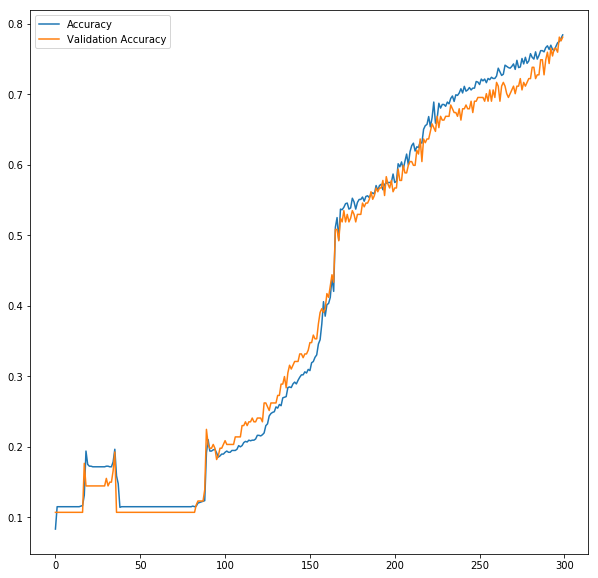

In [25]:
plt.figure(figsize=(10,10))
plt.plot(acc,label="Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()

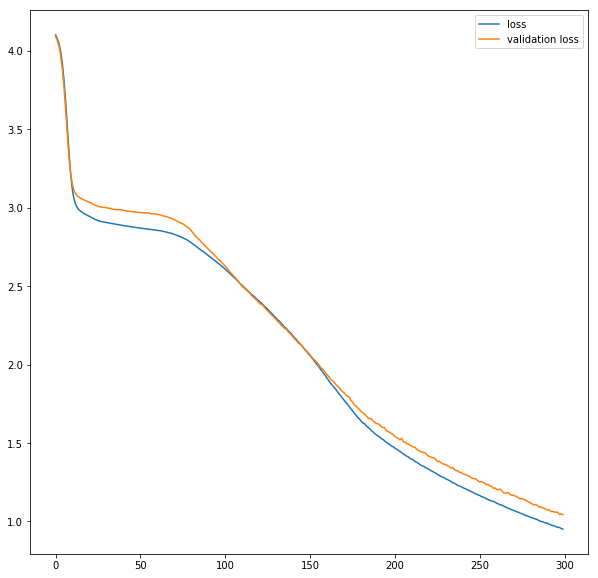

In [26]:
plt.figure(figsize=(10,10))
plt.plot(loss,label="loss")
plt.plot(val_loss,label="validation loss")
plt.legend()

再看一下test_set的效果

In [27]:
model.evaluate(X_test, y_test)

234/234 [==============================] - 0s 90us/sample - loss: 1.0119 - acc: 0.7650


[1.0118810254284458, 0.76495725]

93% 准确度

In [28]:
x_tt = np.array([mtd.embed("今天我被公司开除了，公司不准备付给我加班费，而且他们让我直接从公司离开，明明当时签了合同，我现在应该怎么办？",plantiff="", defendant="", third_party="")])
prob = model.predict(x_tt)[0]
print(pd.factorize(law_list.drop(index=drop_list,axis=0)['tiao_used'])[1][np.argmax(prob)])

第四十六条


如果去回查的话

七十二条：社会保险基金按照保险类型确定资金来源，逐步实行社会统筹。用人单位和劳动者必须依法参加社会保险，缴纳社会保险费。

四十六条：工资分配应当遵循按劳分配原则，实行同工同酬。 工资水平在经济发展的基础上逐步提高。国家对工资总量实行宏观调控。

四十七条：用人单位根据本单位的生产经营特点和经济效益，依法自主确定本单位的工资分配方式和工资水平。

好像并不是很确切

In [29]:
x_tt = np.array([mtd.embed("公司一直拖欠供暖费不给，应该看什么法律？",plantiff="", defendant="", third_party="")])
prob = model.predict(x_tt)[0]
print(pd.factorize(law_list.drop(index=drop_list,axis=0)['tiao_used'])[1][np.argmax(prob)])

第四十七条


# 总结

虽然结果还是很不错的，至少没有使用RNN的情况下，只做embedding就有这个准确率，还是很不错的。

虽然现在只做了一个劳动法的条的检索，其实如果套上别的法律，按照同样的想法，效果应该很不错。

但如果直接拿一段文字来尝试，模型效果还是欠佳。